In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [99]:
dataset = pd.read_csv('D:/NLP/Churn_Modelling.csv')
print(dataset['Geography'].unique())
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

['France' 'Spain' 'Germany']


In [100]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [101]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)
print(X)


      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Germany  Spai

In [102]:
X = X.drop(['Geography','Gender'],axis=1)


In [103]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [104]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [105]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [106]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

In [107]:
# Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform', activation='relu'))
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [108]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [109]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [110]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 288us/sample - loss: 0.5918 - accuracy: 0.7634 - val_loss: 0.5458 - val_accuracy: 0.7929
Epoch 2/100
5359/5359 [==============================] - 1s 180us/sample - loss: 0.5215 - accuracy: 0.7951 - val_loss: 0.5078 - val_accuracy: 0.7970
Epoch 3/100
5359/5359 [==============================] - 1s 184us/sample - loss: 0.4919 - accuracy: 0.7960 - val_loss: 0.4871 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 1s 176us/sample - loss: 0.4733 - accuracy: 0.7962 - val_loss: 0.4732 - val_accuracy: 0.7982
Epoch 5/100
5359/5359 [==============================] - 1s 182us/sample - loss: 0.4597 - accuracy: 0.8028 - val_loss: 0.4621 - val_accuracy: 0.7997
Epoch 6/100
5359/5359 [==============================] - 1s 181us/sample - loss: 0.4491 - accuracy: 0.8091 - val_loss: 0.4536 - val_accuracy: 0.8050
Epoch 7/100
5359/5359 [==============================] - 1

5359/5359 [==============================] - 1s 180us/sample - loss: 0.3749 - accuracy: 0.8350 - val_loss: 0.3852 - val_accuracy: 0.8364
Epoch 56/100
5359/5359 [==============================] - 1s 180us/sample - loss: 0.3742 - accuracy: 0.8343 - val_loss: 0.3848 - val_accuracy: 0.8357
Epoch 57/100
5359/5359 [==============================] - 1s 181us/sample - loss: 0.3736 - accuracy: 0.8347 - val_loss: 0.3843 - val_accuracy: 0.8372
Epoch 58/100
5359/5359 [==============================] - 1s 180us/sample - loss: 0.3731 - accuracy: 0.8350 - val_loss: 0.3839 - val_accuracy: 0.8357
Epoch 59/100
5359/5359 [==============================] - 1s 180us/sample - loss: 0.3727 - accuracy: 0.8350 - val_loss: 0.3834 - val_accuracy: 0.8357
Epoch 60/100
5359/5359 [==============================] - 1s 183us/sample - loss: 0.3720 - accuracy: 0.8350 - val_loss: 0.3830 - val_accuracy: 0.8345
Epoch 61/100
5359/5359 [==============================] - 1s 187us/sample - loss: 0.3715 - accuracy: 0.8349 - val

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


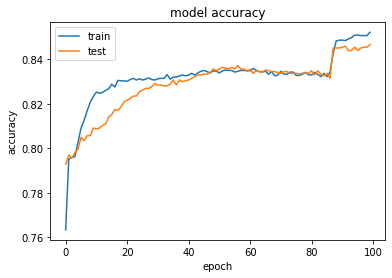

In [111]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

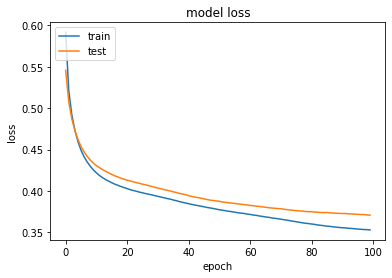

In [112]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [113]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [114]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1519   76]
 [ 211  194]]


In [115]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.8565
